In [2]:
import numpy as np
import pandas as pd
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import rasterio as rs
from rasterio.plot import show, adjust_band
from rasterstats import zonal_stats
import osmnx as ox
from rasterio import plot
from rasterio.plot import show
from rasterio.mask import mask
from rasterio import features
import os
import json



## Work on map 13

### 1 ) Read the DSM shape file with geopandas

In [8]:
#read the file
df = gpd.read_file ('DHMVIIDSMRAS1m_k13\DHMVII_vdc_k13\DHMVII_vdc_k13.shp')
df

<>:1: DeprecationWarning: invalid escape sequence \D
<>:1: DeprecationWarning: invalid escape sequence \D
<ipython-input-8-623bb40e95f1>:1: DeprecationWarning: invalid escape sequence \D
  df = gpd.read_file ('DHMVIIDSMRAS1m_k13\DHMVII_vdc_k13\DHMVII_vdc_k13.shp')


,Date,OpnDatum1,OpnDatum2,geometry
0,20150305,2015-03-05,None,"POLYGON Z ((98000.000 217783.121 0.000, 97997...."
1,20150306,2015-03-06,None,"POLYGON Z ((98000.000 217465.109 0.000, 98000...."
2,20150308,2015-03-08,None,"POLYGON Z ((98000.000 213046.450 0.000, 98000...."
3,20150310,2015-03-10,None,"POLYGON Z ((98000.000 209075.241 0.000, 98000...."
4,20150311,2015-03-11,None,"POLYGON Z ((98000.000 204542.782 0.000, 98000...."
5,20150312,2015-03-12,None,"POLYGON Z ((98000.000 200890.510 0.000, 98000...."
6,20150306,2015-03-05,2015-03-06,"POLYGON Z ((98000.000 217783.121 0.000, 98000...."
7,20150308,2015-03-06,2015-03-08,"POLYGON Z ((98000.000 213353.093 0.000, 98000...."
8,20150308,2015-03-08,2015-03-10,"POLYGON Z ((98000.000 209451.047 0.000, 98000...."
9,20150311,2015-03-10,2015-03-11,"MULTIPOLYGON Z (((83711.340 207094.910 0.000, ..."


In [9]:
#get info
df.info

C:\Users\emora\anaconda3\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<bound method DataFrame.info of         Date   OpnDatum1   OpnDatum2  \
0   20150305  2015-03-05        None   
1   20150306  2015-03-06        None   
2   20150308  2015-03-08        None   
3   20150310  2015-03-10        None   
4   20150311  2015-03-11        None   
5   20150312  2015-03-12        None   
6   20150306  2015-03-05  2015-03-06   
7   20150308  2015-03-06  2015-03-08   
8   20150308  2015-03-08  2015-03-10   
9   20150311  2015-03-10  2015-03-11   
10  20150312  2015-03-11  2015-03-12   
11  20150313  2015-03-12  2015-03-13   

                                             geometry  
0   POLYGON Z ((98000.000 217783.121 0.000, 97997....  
1   POLYGON Z ((98000.000 217465.109 0.000, 98000....  
2   POLYGON Z ((98000.000 213046.450 0.000, 98000....  
3   POLYGON Z ((98000.000 209075.241 0.000, 98000....  
4   POLYGON Z ((98000.000 204542.782 0.000, 98000....  
5   POLYGON Z ((98000.000 200890.510 0.000, 98000....  
6   POLYGON Z ((98000.000 217783.121 0.000, 98000....  

C:\Users\emora\anaconda3\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

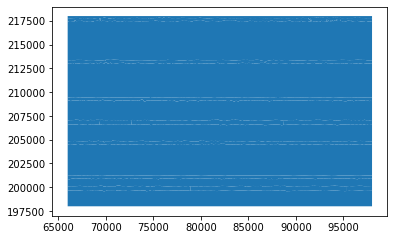

In [12]:
#get the plot
df.plot()

### 2) Read the DSM tiff

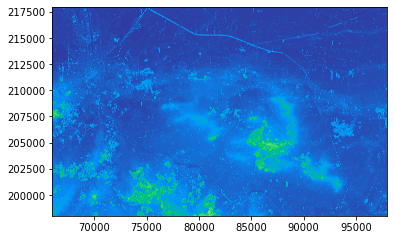

<AxesSubplot:>

In [14]:
#open the DSM tiff and plot 
fp = r'DHMVIIDSMRAS1m_k13\GeoTIFF\DHMVIIDSMRAS1m_k13.tif'
img = rs.open(fp)
show(img, cmap = 'terrain')

In [11]:
#print the number of band, size and CRS
print (img.count)
print (img.height, img.width)
print (img.crs)

1
20000 32000
EPSG:31370


### 3) Read the DTM shape file

In [13]:
#open of the DTM file
df2 = gpd.read_file ('DHMVIIDTMRAS1m_k13\DHMVII_vdc_k13\DHMVII_vdc_k13.shp')
df2

,Date,OpnDatum1,OpnDatum2,geometry
0,20150305,2015-03-05,None,"POLYGON Z ((98000.000 217783.121 0.000, 97997...."
1,20150306,2015-03-06,None,"POLYGON Z ((98000.000 217465.109 0.000, 98000...."
2,20150308,2015-03-08,None,"POLYGON Z ((98000.000 213046.450 0.000, 98000...."
3,20150310,2015-03-10,None,"POLYGON Z ((98000.000 209075.241 0.000, 98000...."
4,20150311,2015-03-11,None,"POLYGON Z ((98000.000 204542.782 0.000, 98000...."
5,20150312,2015-03-12,None,"POLYGON Z ((98000.000 200890.510 0.000, 98000...."
6,20150306,2015-03-05,2015-03-06,"POLYGON Z ((98000.000 217783.121 0.000, 98000...."
7,20150308,2015-03-06,2015-03-08,"POLYGON Z ((98000.000 213353.093 0.000, 98000...."
8,20150308,2015-03-08,2015-03-10,"POLYGON Z ((98000.000 209451.047 0.000, 98000...."
9,20150311,2015-03-10,2015-03-11,"MULTIPOLYGON Z (((83711.340 207094.910 0.000, ..."


<AxesSubplot:>

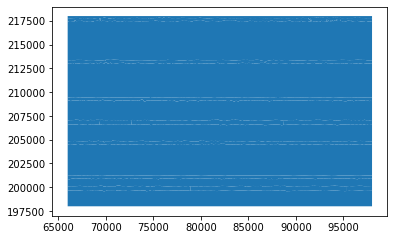

In [14]:
#plot of the shp
df2.plot()

### 4) Read the DTM tiff file

In [4]:
#open the DTM
fp2_1 = rs.open ('DHMVIIDTMRAS1m_k13\GeoTIFF\DHMVIIDTMRAS1m_k13.tif')

#get CRS info
fp2_1.crs


CRS.from_epsg(31370)

In [18]:
#get bouding box
fp2_1.bounds

BoundingBox(left=66000.0, bottom=198000.0, right=98000.0, top=218000.0)

In [21]:
#get affin information
fp2_1.transform

Affine(1.0, 0.0, 66000.0,
       0.0, -1.0, 218000.0)

In [23]:
#get number of band
fp2_1.indexes

(1,)

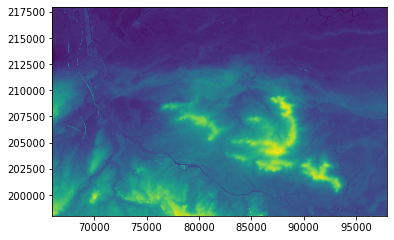

<AxesSubplot:>

In [7]:
#plot the DTM
show(fp2_1)  

### 5) get the geometry of Bruges with osmnx

In [5]:
bruges_q = "Bruges,West Flanders, Flanders, Belgium"

In [11]:
bruges = ox.geometries_from_place(bruges_q, tags = {'building': True})
bruges.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 74997 entries, 0 to 74996
Columns: 320 entries, unique_id to industrial
dtypes: geometry(1), int64(1), object(318)
memory usage: 183.7+ MB


In [12]:
bruges = bruges.to_crs(crs=img.crs.data)

C:\Users\emora\anaconda3\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\emora\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

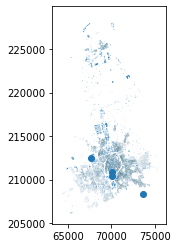

In [13]:
#ax = show((img)
#ox.plot_graph(bruges)
bruges.plot()